### Polynomial Regression

In [1]:
import numpy as np
import pandas as pd

In [5]:
df2 = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Position_Salaries.csv')
df2

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


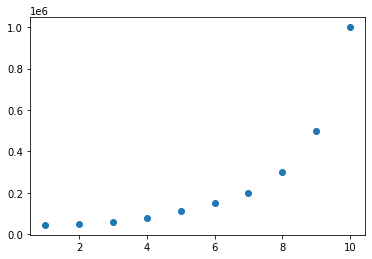

In [6]:
# import matplotlib.pyplot as plt
# plt.scatter(df2['Level'], df2['Salary'])

In [12]:
X1 = df2[['Level']]
Y1 = df2['Salary']

In [7]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()

In [14]:
lin_reg.fit(X1, Y1)

LinearRegression()

In [16]:
y_predict1 = lin_reg.predict(X1)
y_predict1

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(Y1, y_predict1)

0.6690412331929895

In [19]:
import matplotlib.pyplot as plt

### Polynomial Regression
- **Foemula**

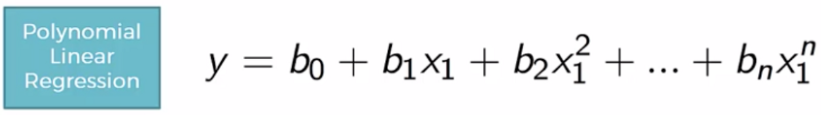

In [20]:
X2 = df2[['Level']]
Y2 = df2['Salary']

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
x_poly = PolynomialFeatures()
x_poly

PolynomialFeatures()

In [24]:
x_poly1 = PolynomialFeatures(degree = 2)
x_poly1
# degree = 2 ---> 0, 1, 2
# X ** 0, X ** 1, X ** 2

# Degree increases --> Complexity increases

PolynomialFeatures()

In [25]:
x_poly2 = x_poly1.fit_transform(X2)
x_poly2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

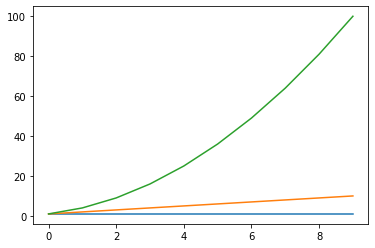

In [28]:
plt.plot(x_poly2)

In [29]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly2,Y2)

LinearRegression()

In [30]:
y_predict2 = lin_reg2.predict(x_poly2)
y_predict2

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

In [31]:
r2_score(Y2, y_predict2)

0.9162082221443942

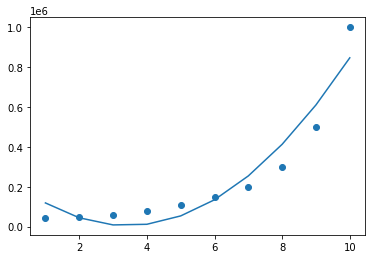

In [37]:
plt.scatter(X2,Y2)
plt.plot(X2,y_predict2)

#### Split data set for Training and Testing

In [3]:
from sklearn.datasets import load_boston

In [4]:
df2 = load_boston()

In [5]:
df3 = pd.DataFrame(df2.data, 
                   columns = df2.feature_names)
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df3['MedV'] = df2.target
df3.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [7]:
X3 = df3.drop(['MedV'], axis=1) # Input or independent
Y3 = df3['MedV']  # Target or dependent

In [8]:
X3.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X3,Y3, 
                                                 test_size=0.2,
                                                 random_state=42)

In [11]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [13]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_reg1 = LinearRegression()

In [18]:
lin_reg1.fit(X_train, Y_train)# Training

LinearRegression()

In [19]:
y_predict1 = lin_reg1.predict(X_test)# testing
y_predict1[:5]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992])

In [20]:
Y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MedV, dtype: float64

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [22]:
print('Training Performance: ', lin_reg1.score(X_train, Y_train))

print('Testing Performance: ', lin_reg1.score(X_test, Y_test))

Training Performance:  0.7508856358979673
Testing Performance:  0.6687594935356294


### Regularization Models
- Regularization models are one of the regression models
- Used to solve underfiting and overfiting problems.
- Types
    - Redge Regression or L2-Regularization
        - Used to overcome Overfiting problems
    - Lasso Regression or L1-Regularization
        - Used to overcome Underfitiing problems

- **Overfit:** Model performance is Good while training, but it performs worst while testing
- **Underfit:** Model performance is worst in both training and testing

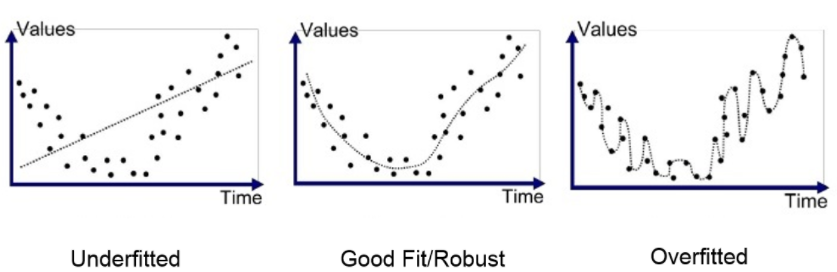

In [25]:
lin_reg1.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

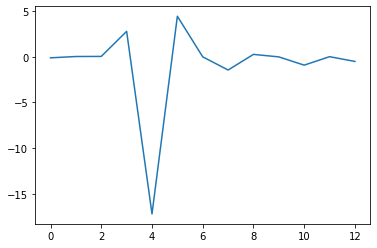

In [28]:
import matplotlib.pyplot as plt
plt.plot(lin_reg1.coef_)

**Redge Regression**

In [24]:
from sklearn.linear_model import Ridge

In [29]:
r1 = Ridge(alpha = 100)

In [30]:
r1.fit(X_train, Y_train)

Ridge(alpha=100)

In [31]:
y_predict2 = r1.predict(X_test)

In [32]:
print('Training Performance: ', r1.score(X_train, Y_train))

print('Testing Performance: ', r1.score(X_test, Y_test))

Training Performance:  0.7230438194128697
Testing Performance:  0.6800123820451881


In [33]:
r1.coef_

array([-1.10764853e-01,  3.98919010e-02, -4.86253730e-02,  5.50701733e-01,
       -1.97858825e-01,  2.43881473e+00,  5.45476646e-04, -1.12939994e+00,
        2.99013586e-01, -1.46298901e-02, -8.17852407e-01,  1.19512041e-02,
       -6.89539142e-01])

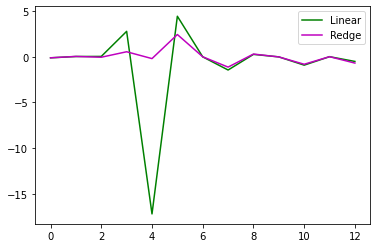

In [38]:
plt.plot(lin_reg1.coef_, color = 'g', label = 'Linear')
plt.plot(r1.coef_, color = 'm', label = 'Redge')
plt.legend()
plt.show()

**Lasso Regression**

In [39]:
from sklearn.linear_model import Lasso

In [41]:
l1 = Lasso(alpha=1.0)

In [42]:
l1.fit(X_train, Y_train)

Lasso()

In [43]:
y_predict3 = l1.predict(X_test)

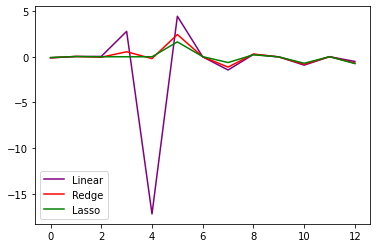

In [47]:
plt.plot(lin_reg1.coef_, color = 'purple', label = 'Linear')
plt.plot(r1.coef_, color = 'r', label = 'Redge')
plt.plot(l1.coef_, color = 'g', label = 'Lasso')
plt.legend()
plt.show()